# East-West (EW) Line: Passenger Flow Analysis

**Objective:** To analyze the hourly passenger flow data for the EW line, identify peak and off-peak periods, and uncover behavioral patterns among its stations.

### 1. Setup and Imports

In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Add the scripts directory to the Python path to import our custom module
scripts_path = "../scripts"
sys.path.append(scripts_path)

In [3]:
# Import all our custom functions
import passenger_flow_utils as pfu

# Configure pandas display options
pd.set_option('display.max_rows', 100)

### 2. Configuration
Define the main variables for this analysis.

In [5]:
# --- Main Configuration ---
FILE_PATH = '../data/EW-Passenger flow-station-hour.csv'
LINE_PREFIX = 'EW'
LINE_NAME = 'East-West Line'

### 3. Data Loading and Initial Exploration
Load the dataset and perform an initial inspection.

In [6]:
# Load the data using our utility function
df_ew = pfu.load_and_prepare_data(FILE_PATH, LINE_PREFIX)

print("--- First 5 Rows ---")
display(df_ew.head())

print("\n--- Data Info ---")
df_ew.info()

--- First 5 Rows ---


,Station,EW1,EW2,EW3,EW4,EW8,EW9,EW10,EW13,EW14,EW18,EW19,EW20,EW21,EW22
0,6:00am to 7:00am,411,201,221,51,12,221,33,221,51,31,98,162,42,300
1,7:00am to 8:00am,579,321,321,60,33,321,56,221,60,109,110,97,133,315
2,8:00am to 9:00am,560,387,411,81,42,411,66,411,81,37,115,173,121,315
3,9:00am to 10:00am,411,311,211,90,41,211,41,211,75,79,117,236,78,501
4,10:00am to 11:00am,251,289,196,56,56,196,56,196,56,160,55,254,43,578



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  16 non-null     object
 1   EW1      16 non-null     int64 
 2   EW2      16 non-null     int64 
 3   EW3      16 non-null     int64 
 4   EW4      16 non-null     int64 
 5   EW8      16 non-null     int64 
 6   EW9      16 non-null     int64 
 7   EW10     16 non-null     int64 
 8   EW13     16 non-null     int64 
 9   EW14     16 non-null     int64 
 10  EW18     16 non-null     int64 
 11  EW19     16 non-null     int64 
 12  EW20     16 non-null     int64 
 13  EW21     16 non-null     int64 
 14  EW22     16 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.0+ KB


### 4. Data Cleaning and Validation
Check for missing values, duplicates, and any data anomalies.

In [7]:
# Perform basic checks for nulls, dtypes, and stats
pfu.basic_checks(df_ew)

--- Shape ---
(16, 15)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  16 non-null     object
 1   EW1      16 non-null     int64 
 2   EW2      16 non-null     int64 
 3   EW3      16 non-null     int64 
 4   EW4      16 non-null     int64 
 5   EW8      16 non-null     int64 
 6   EW9      16 non-null     int64 
 7   EW10     16 non-null     int64 
 8   EW13     16 non-null     int64 
 9   EW14     16 non-null     int64 
 10  EW18     16 non-null     int64 
 11  EW19     16 non-null     int64 
 12  EW20     16 non-null     int64 
 13  EW21     16 non-null     int64 
 14  EW22     16 non-null     int64 
dtypes: int64(14), object(1)
memory usage: 2.0+ KB

--- Null Values ---
Station    0
EW1        0
EW2        0
EW3        0
EW4        0
EW8        0
EW9        0
EW10       0
EW13       0
EW14       0
EW18       0
EW19       0
EW2

In [8]:
# Check for any duplicate time slot entries
duplicate_rows = df_ew.duplicated().sum()
print(f"Number of duplicate rows found: {duplicate_rows}")

Number of duplicate rows found: 0


In [9]:
# Check for anomalies like negative passenger counts
numeric_cols = df_ew.select_dtypes(include='number')
negative_values = (numeric_cols < 0).sum().sum()
print(f"Number of negative passenger counts found: {negative_values}")

Number of negative passenger counts found: 0


### 5. Feature Engineering
Create the `TotalFlow` column to represent the total passenger volume for each time slot.

In [10]:
# Add the 'TotalFlow' column for analysis
df_ew = pfu.add_total_flow(df_ew)

print("--- Dataframe with TotalFlow ---")
display(df_ew[['TotalFlow']].head())

--- Dataframe with TotalFlow ---


,TotalFlow
0,2055
1,2736
2,3211
3,2613
4,2442


### 6. Exploratory Data Analysis (EDA) & Visualization

#### What are the busiest and least busy times on the EW line?

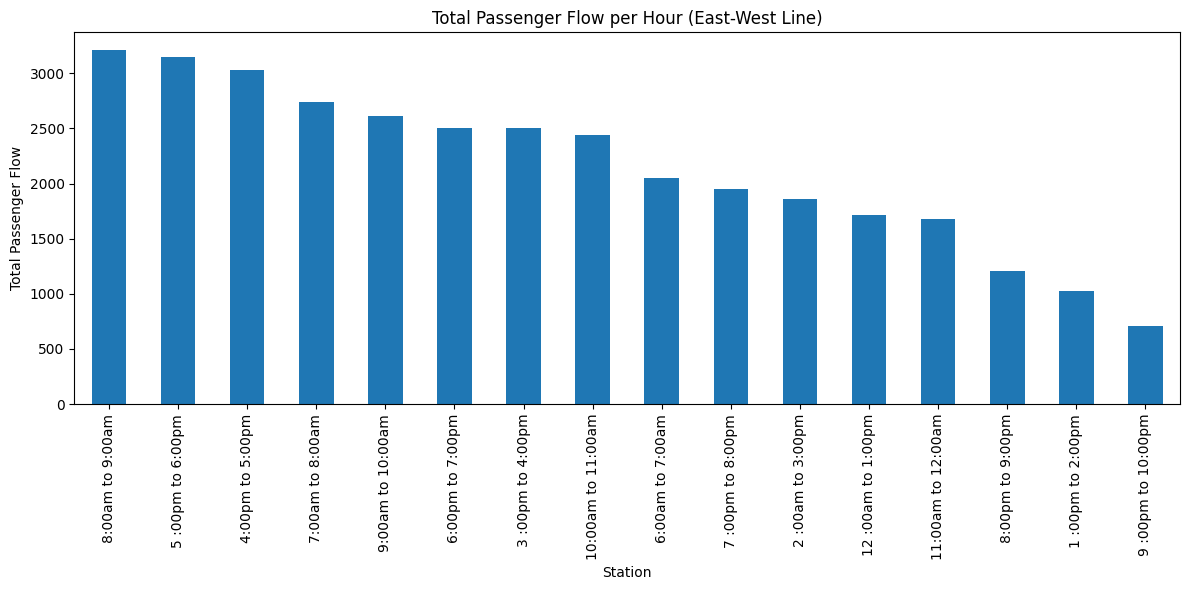

In [11]:
# Plot the total flow per time slot
pfu.plot_total_flow_per_station(
    df_ew,
    title=f'Total Passenger Flow per Hour ({LINE_NAME})'
)

**Insight:** The EW line exhibits a clear bimodal distribution, with a primary peak during the morning rush hour (8:00-9:00 am) and a secondary peak in the evening (5:00-6:00 pm). This is a classic commuter pattern.

#### Which station codes contribute most to the passenger flow?

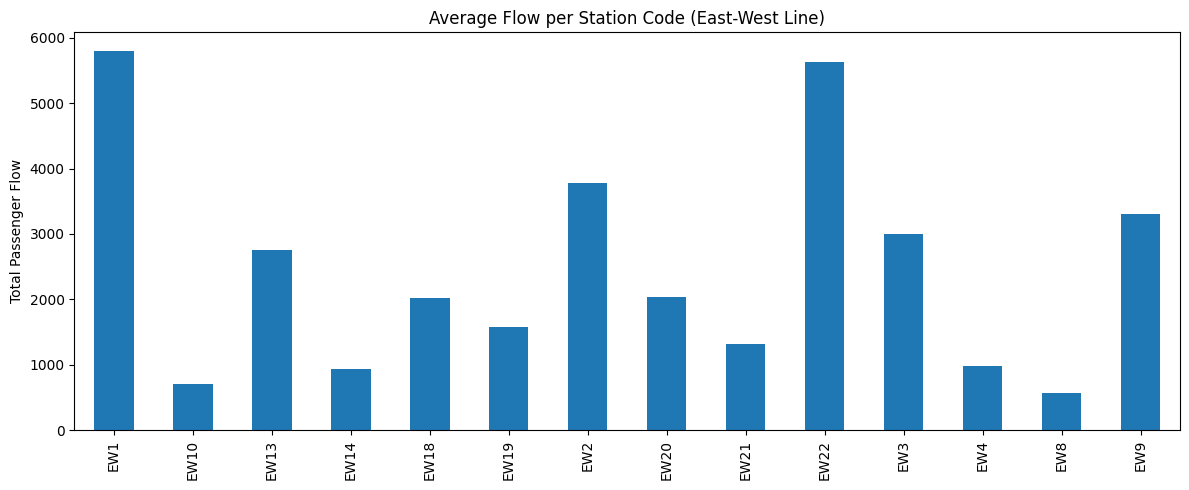

In [12]:
pfu.plot_flow_by_column(
    df_ew,
    title=f'Average Flow per Station Code ({LINE_NAME})'
)

### 7. Advanced Analysis: Identifying Patterns

#### 7.1 Passenger Flow Heatmap
This heatmap visualizes flow intensity across all hours and station codes, making it easy to spot patterns.

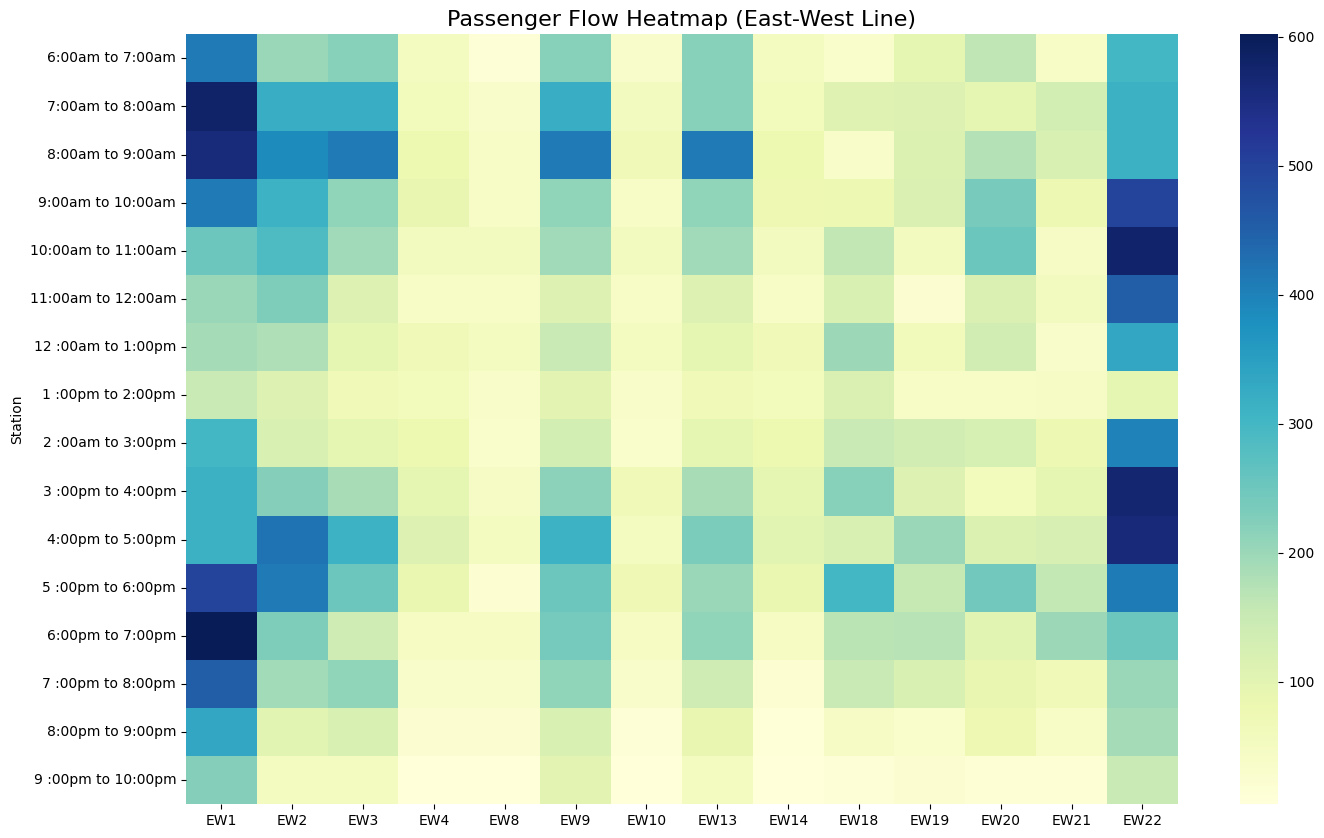

In [13]:
pfu.plot_flow_heatmap(
    df_ew,
    title=f'Passenger Flow Heatmap ({LINE_NAME})'
)

**Insight:** The heatmap reinforces the bimodal pattern. The bright yellow blocks clearly show the morning and evening peaks. We can also see which specific station codes (e.g., EW1, EW22) are busiest during these times.

#### 7.2. Station Clustering by Flow Pattern
Using KMeans clustering, we can group stations that exhibit similar ridership patterns throughout the day. This helps identify stations that serve similar functions (e.g., residential hubs, commercial centers).

We will analyze this in two ways:
1.  **Clustering stations (columns)** based on their hourly flows.
2.  **Clustering time slots (rows)** based on their cross-station traffic.

C:\Users\helin\AppData\Local\Temp\ipykernel_38300\4167719512.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax1.text(df_ew_for_station_clustering['pca1'][i] + 0.1, df_ew_for_station_clustering['pca2'][i], station, fontsize=9)
C:\Users\helin\AppData\Local\Temp\ipykernel_38300\4167719512.py:68: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.text(df_ew_for_time_clustering['pca1'][i] + 0.1, df_ew_for_time_clustering['pca2'][i], timeslot, fontsize=9)


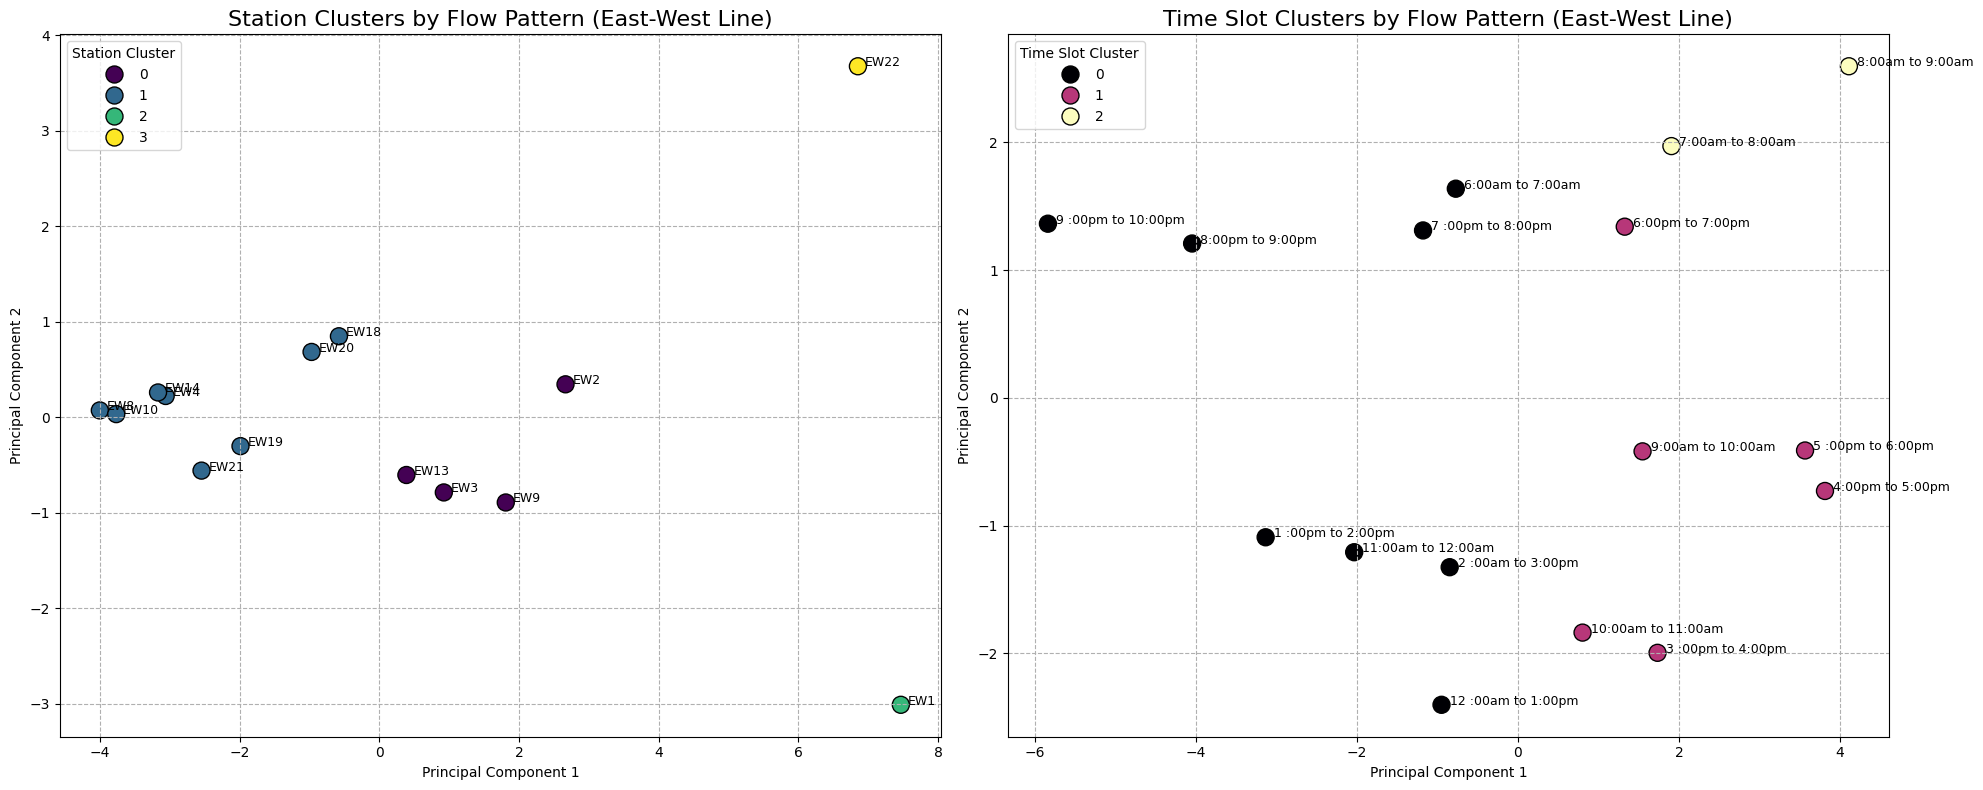

--- Stations Grouped by Behavior ---
Cluster 0: ['EW2', 'EW3', 'EW9', 'EW13']
Cluster 1: ['EW4', 'EW8', 'EW10', 'EW14', 'EW18', 'EW19', 'EW20', 'EW21']
Cluster 2: ['EW1']
Cluster 3: ['EW22']

--- Time Slots Grouped by Behavior ---
Cluster 0: ['6:00am to 7:00am', '11:00am to 12:00am', '12 :00am to 1:00pm', '1 :00pm to 2:00pm', '2 :00am to 3:00pm', '7 :00pm to 8:00pm', '8:00pm to 9:00pm', '9 :00pm to 10:00pm']
Cluster 1: ['9:00am to 10:00am', '10:00am to 11:00am', '3 :00pm to 4:00pm', '4:00pm to 5:00pm', '5 :00pm to 6:00pm', '6:00pm to 7:00pm']
Cluster 2: ['7:00am to 8:00am', '8:00am to 9:00am']


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CLUSTERING STATIONS (COLUMNS) ---

# Prepare the data by transposing it, so stations are rows
df_ew_for_station_clustering = df_ew.drop(columns=['Station', 'TotalFlow']).set_index(df_ew['Station']).transpose()

# Scale the hourly data for each station
scaler_station = StandardScaler()
X_stations_scaled = scaler_station.fit_transform(df_ew_for_station_clustering)

# Perform KMeans clustering (e.g., into 4 types of stations)
kmeans_stations = KMeans(n_clusters=4, random_state=42, n_init='auto')
df_ew_for_station_clustering['Cluster'] = kmeans_stations.fit_predict(X_stations_scaled)

# Use PCA for 2D visualization
pca_stations = PCA(n_components=2)
pca_station_result = pca_stations.fit_transform(X_stations_scaled)
df_ew_for_station_clustering[['pca1', 'pca2']] = pca_station_result


# --- 2. CLUSTERING TIME SLOTS (ROWS) ---

# Prepare the data with time slots as rows
df_ew_for_time_clustering = df_ew.drop(columns=['TotalFlow']).set_index('Station')

# Scale the station flow data for each hour
scaler_time = StandardScaler()
X_time_scaled = scaler_time.fit_transform(df_ew_for_time_clustering)

# Perform KMeans clustering (e.g., into 3 types of hours: peak, off-peak, shoulder)
kmeans_time = KMeans(n_clusters=3, random_state=42, n_init='auto')
df_ew_for_time_clustering['Cluster'] = kmeans_time.fit_predict(X_time_scaled)

# Use PCA for 2D visualization
pca_time = PCA(n_components=2)
pca_time_result = pca_time.fit_transform(X_time_scaled)
df_ew_for_time_clustering[['pca1', 'pca2']] = pca_time_result


# --- VISUALIZATION ---

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot Station Clusters
sns.scatterplot(data=df_ew_for_station_clustering, x='pca1', y='pca2', hue='Cluster', palette='viridis', s=150, ax=ax1, edgecolor='black')
ax1.set_title(f'Station Clusters by Flow Pattern ({LINE_NAME})', fontsize=16)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.legend(title='Station Cluster')
ax1.grid(True, linestyle='--')
for i, station in enumerate(df_ew_for_station_clustering.index):
    ax1.text(df_ew_for_station_clustering['pca1'][i] + 0.1, df_ew_for_station_clustering['pca2'][i], station, fontsize=9)

# Plot Time Slot Clusters
sns.scatterplot(data=df_ew_for_time_clustering, x='pca1', y='pca2', hue='Cluster', palette='magma', s=150, ax=ax2, edgecolor='black')
ax2.set_title(f'Time Slot Clusters by Flow Pattern ({LINE_NAME})', fontsize=16)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend(title='Time Slot Cluster')
ax2.grid(True, linestyle='--')
for i, timeslot in enumerate(df_ew_for_time_clustering.index):
    ax2.text(df_ew_for_time_clustering['pca1'][i] + 0.1, df_ew_for_time_clustering['pca2'][i], timeslot, fontsize=9)

plt.tight_layout()
plt.show()

# --- Display Cluster Contents ---
print("--- Stations Grouped by Behavior ---")
for i in range(4):
    stations = df_ew_for_station_clustering[df_ew_for_station_clustering['Cluster'] == i].index.tolist()
    print(f"Cluster {i}: {stations}")

print("\n--- Time Slots Grouped by Behavior ---")
for i in range(3):
    timeslots = df_ew_for_time_clustering[df_ew_for_time_clustering['Cluster'] == i].index.tolist()
    print(f"Cluster {i}: {timeslots}")

### 8. Summary of Findings

In [ ]:
# Get busiest and least busy time slots
top_stations, bottom_stations = pfu.get_top_bottom_stations(df_ew, n=5)

print(f"--- Top 5 Busiest Hours ({LINE_NAME}) ---")
display(top_stations)

print(f"\n--- Top 5 Least Busy Hours ({LINE_NAME}) ---")
display(bottom_stations)

--- Top 5 Busiest Hours (East-West Line) ---


,Station,TotalFlow
2,8:00am to 9:00am,3211
11,5 :00pm to 6:00pm,3150
10,4:00pm to 5:00pm,3030
1,7:00am to 8:00am,2736
3,9:00am to 10:00am,2613



--- Top 5 Least Busy Hours (East-West Line) ---


,Station,TotalFlow
6,12 :00am to 1:00pm,1719
5,11:00am to 12:00am,1680
14,8:00pm to 9:00pm,1211
7,1 :00pm to 2:00pm,1028
15,9 :00pm to 10:00pm,712


In [17]:
# Create the full summary table
summary_table = pfu.create_summary_table(df_ew)

print(f"\n--- Full Summary Table ({LINE_NAME}) ---")
display(summary_table.head())


--- Full Summary Table (East-West Line) ---


,Station,Total Flow,Busiest Code,Least Used Code
0,8:00am to 9:00am,3211,EW1,EW18
1,5 :00pm to 6:00pm,3150,EW1,EW8
2,4:00pm to 5:00pm,3030,EW22,EW8
3,7:00am to 8:00am,2736,EW1,EW8
4,9:00am to 10:00am,2613,EW22,EW8


### 9. Conclusion for EW Line

The East-West Line analysis reveals:
- **Strong Commuter Focus:** A clear bimodal pattern with a dominant morning peak.
- **Key Hubs:** Stations like `EW1` and `EW22` are major drivers of passenger traffic.
- **Predictable Lulls:** Midday and late-evening periods show significantly lower traffic, offering opportunities for operational adjustments.